 # <div align="center">A/B Testing</div>
---------------------------------------------------------------------

you can Find me on Github:
> ###### [ GitHub](https://github.com/lev1khachatryan)

<img src="main.gif" />

# <div align="center">Outline for A/B Tests</div>
---------------------------------------------------------------------

1. Set up the experiment.
2. Run the test and record the success rate for each group.
3. Plot the distribution of the difference between the two samples.
4. Hypothesis
5. Calculate the statistical power.
6. Evaluate how sample size affects A/B tests.

## <div align="center">1. Set Up The Experiment</div>
---------------------------------------------------------------------

We will run an A/B test for a hypothetical company that is trying to increase the amount of users that sign up for a premium account. The goal of running an A/B test is to evaluate if a change in a website will lead to improved performance in a specific metric. You may decide to test very simple alternatives such as changing the look of a single button on a webpage or testing different layouts and headlines. You could also run an A/B test on multi-step processes which may have many differences. Examples of this include the steps required in signing up a new user or processing the sale on an online marketplace. A/B testing is a huge subject and there are many techniques and rules on setting up an experiment.

### <div align="center">Baseline Conversion Rate and Lift</div>
---------------------------------------------------------------------  
Before running the test, we will know the baseline conversion rate and the desired lift or increase in signups that we would like to test. The baseline conversion rate is the current rate at which we sign up new users under the existing design. For our example, we want to use our test to confirm that the changes we make to our signup process will result in at least a 2% increase in our sign up rate. We currently sign up 10 out of 100 users who are offered a premium account.

In [1]:
bcr = 0.10  # baseline conversion rate
d_hat = 0.02  # difference between the groups

### <div align="center">Control Group (A) and Test Group (B)</div>
---------------------------------------------------------------------  
Typically, the total number of users participating in the A/B test make up a small percentage of the total amount of users. Users are randomly selected and assigned to either a control group or a test group. The sample size that you decide on will determine how long you might have to wait until you have collected enough. For example, websites with large audiences may be able to collect enough data very quickly, while other websites may have to wait a number of weeks. There are some events that happen rarely even for high-traffic websites, so determining the necessary sample size will inform how soon you can assess your experiment and move on to improving other metrics.

Initially, we will collect 1000 users for each group and serve the current signup page to the control group and a new signup page to the test group.

In [2]:
# A is control; B is test
N_A = 1000
N_B = 1000

## <div align="center">2. Run the Test</div>
---------------------------------------------------------------------
Because this is a hypothetical example, we will need “fake” data to work on. I wrote a function that will generate data for our simulation.

In [11]:
from generate_data import *
import numpy as np
import pandas as pd

ab_data = generate_data(N_A, N_B, bcr, d_hat)

In [12]:
ab_summary = ab_data.pivot_table(values='converted', index='group', aggfunc=np.sum)
# add additional columns to the pivot table
ab_summary['total'] = ab_data.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
ab_summary['rate'] = ab_data.pivot_table(values='converted', index='group')

ab_summary

,converted,total,rate
group,,,
A,98,1024,0.095703
B,123,976,0.126025


In [17]:
A_total = 1024
A_converted = 98
A_cr = 0.095
B_total = 976
B_converted = 126
B_cr = 0.126

The converted column indicates whether a user signed up for the premium service or not with a 1 or 0, respectively. The A group will be used for our control group and the B group will be our test group.

It looks like the difference in conversion rates between the two groups is 0.034 which is greater than the lift we initially wanted of 0.02. This is a good sign but this is not enough evidence for us to confidently go with the new design. At this point we have not measured how confident we are in this result. This can be mitigated by looking at the distributions of the two groups.

## <div align="center">3. Compare the Two Groups</div>
---------------------------------------------------------------------

We can compare the two groups by plotting the distribution of the control group and calculating the probability of getting the result from our test group. We can assume that the distribution for our control group is binomial because the data is a series of Bernoulli trials, where each trial only has two possible outcomes.

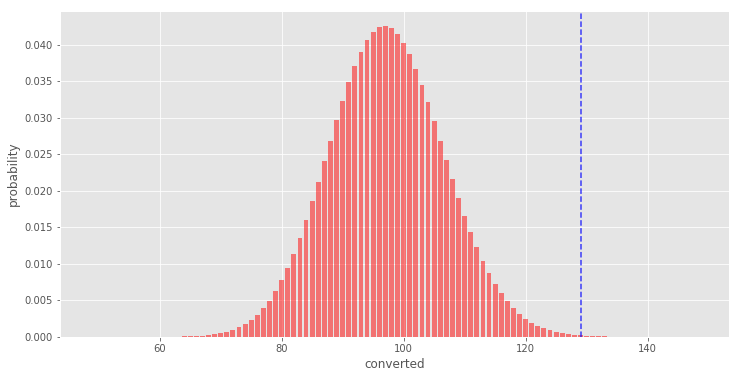

In [18]:
import scipy.stats as scs
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(A_converted-49, A_converted+50, 100)
y = scs.binom(A_total, A_cr).pmf(x)
ax.bar(x, y, alpha=0.5, color='r')
ax.axvline(x=B_cr * A_total, c='blue', alpha=0.75, linestyle='--')
plt.xlabel('converted')
plt.ylabel('probability')
plt.show();

The distribution for the control group is shown in red and the result from the test group is indicated by the blue dashed line. We can see that the probability of getting the result from the test group was very low. However, the probability does not convey the confidence level of the results. It does not take the sample size of our test group into consideration. Intuitively, we would feel more confident in our results as our sample sizes grow larger. Let’s continue and plot the test group results as a binomial distribution and compare the distributions against each other.

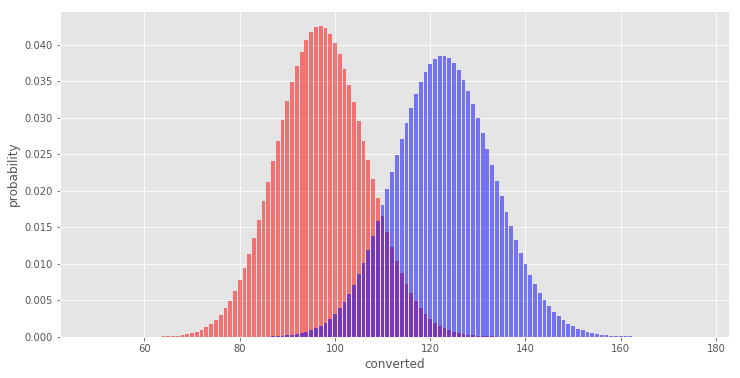

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(A_converted-49, A_converted+50, 100)
yA = scs.binom(A_total, A_cr).pmf(xA)
ax.bar(xA, yA, alpha=0.5,color='r' )

xB = np.linspace(B_converted-49, B_converted+50, 100)
yB = scs.binom(B_total, B_cr).pmf(xB)
ax.bar(xB, yB, alpha=0.5, color='b')
plt.xlabel('converted')
plt.ylabel('probability')
plt.show();

We can see that the control group converted more users than the test group. We can also see that the peak of the test group results is lower than the control group. How do we interpret the difference in peak probability? We should focus instead on the conversion rate so that we have an apples-to-apples comparison.

## <div align="center">4. Compare the Null Hypothesis vs. the Alternate Hypothesis</div>
---------------------------------------------------------------------

Let’s start off by defining the null hypothesis and the alternate hypothesis.

* The null hypothesis is the position that the change in the design made for the test group would result in no change in the conversion rate.
* The alternative hypothesis is the opposing position that the change in the design for the test group would result in an improvement (or reduction) in the conversion rate.

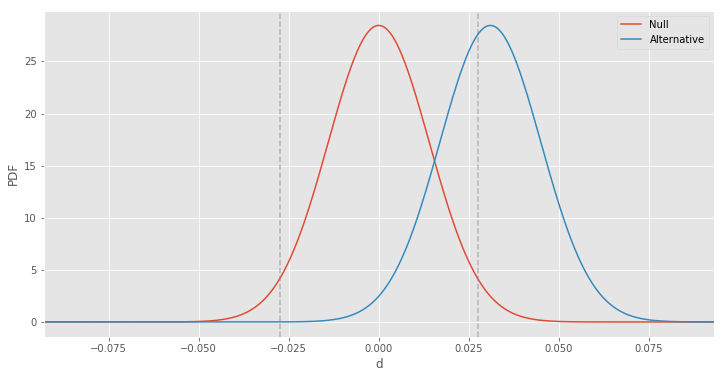

In [20]:
from plot import *
bcr = A_cr  
d_hat = B_cr - A_cr
abplot(N_A, N_B, bcr, d_hat)

## <div align="center">5. Statistical Power and Significance Level</div>
---------------------------------------------------------------------
I think it is easier to define statistical power and significance level by first showing how they are represented in the plot of the null and alternative hypothesis. We can return a visualization of the statistical power by adding the parameter show_power=True.

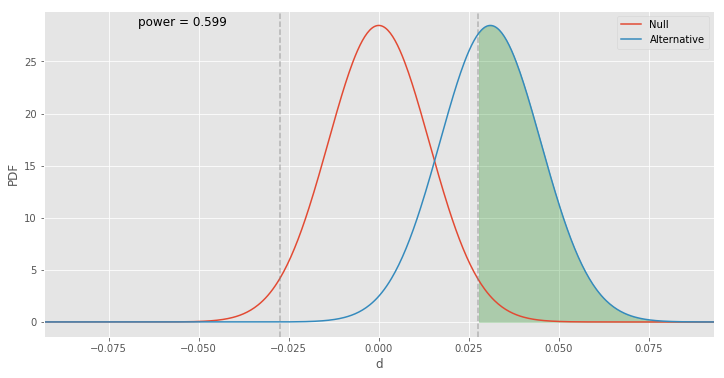

In [21]:
abplot(N_A, N_B, bcr, d_hat, show_power=True)

The green shaded area represents the statistical power, and the calculated value for power is also displayed on the plot. The gray dashed lines in the plot above represent the confidence interval (95% for the plot above) for the null hypothesis. Statistical power is calculated by finding the area under the alternative hypothesis distribution and outside of the confidence interval of the null hypothesis.

After running our experiment, we get a resulting conversion rate for both groups. If we calculate the difference between the conversion rates, we end up with one result, the difference or the effect of the design change. Our task is to determine which population this result came from, the null hypothesis or the alternative hypothesis.

The area under the alternative hypothesis curve is equal to 1. If the alternative design is truly better, the power is the probability that we accept the alternative hypothesis and reject the null hypothesis and is equal to the area shaded green (true positive). The opposite area under the alternative curve is the probability that we accept the null hypothesis and reject the alternative hypothesis (false negative). This is referred to as beta in A/B testing or hypothesis testing and is shown below.

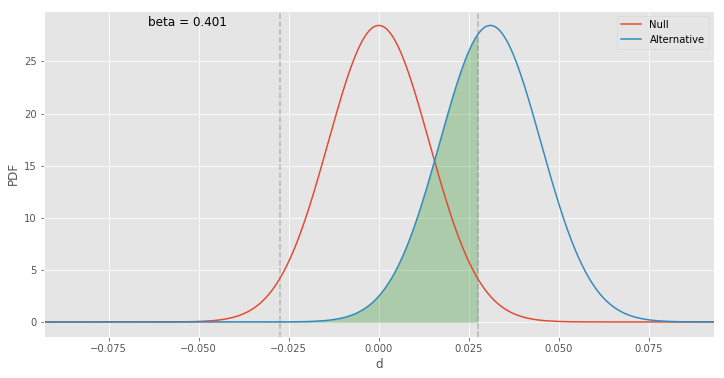

In [22]:
abplot(N_A, N_B, bcr, d_hat, show_beta=True)

The gray dashed line that divides the area under the alternative curve into two also directly segments the area associated with the significance level, often denoted with the greek letter alpha.

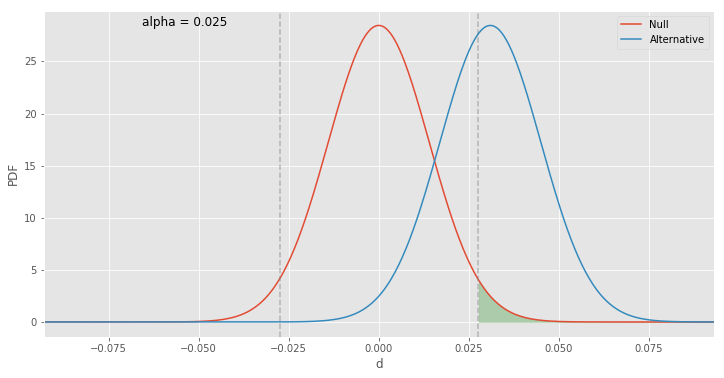

In [23]:
abplot(N_A, N_B, bcr, d_hat, show_alpha=True)

If the null hypothesis is true and there truly is no difference between the control and test groups, then the significance level is the probability that we would reject the null hypothesis and accept the alternative hypothesis (false positive). A false positive is when we mistakenly conclude that the new design is better. This value is low because we want to limit this probability.

## <div align="center">6. Sample Size</div>
---------------------------------------------------------------------

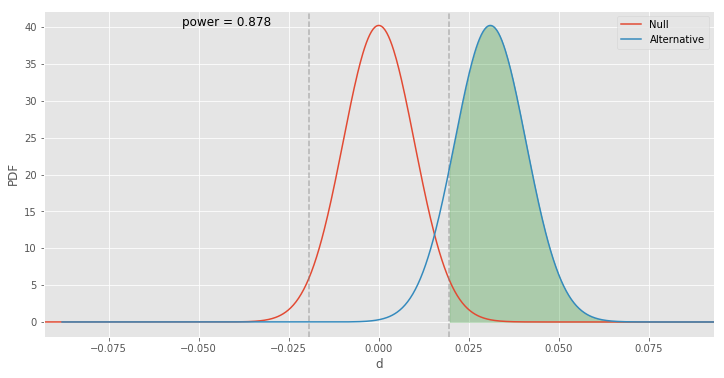

In [24]:
abplot(2000, 2000, bcr, d_hat, show_power=True)

In [29]:
import scipy.stats as scs

def min_sample_size(bcr, mde, power=0.8, sig_level=0.05):
    """Returns the minimum sample size to set up a split test
    Arguments:
        bcr (float): probability of success for control, sometimes
        referred to as baseline conversion rate
        mde (float): minimum change in measurement between control
        group and test group if alternative hypothesis is true, sometimes
        referred to as minimum detectable effect
        power (float): probability of rejecting the null hypothesis when the
        null hypothesis is false, typically 0.8
        sig_level (float): significance level often denoted as alpha,
        typically 0.05
    Returns:
        min_N: minimum sample size (float)
    """
    
    standard_norm = scs.norm(0, 1)

    Z_beta = standard_norm.ppf(power)

    Z_alpha = standard_norm.ppf(1-sig_level/2)

    pooled_prob = (bcr + bcr+mde) / 2

    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2
             / mde**2)

    return min_N

In [26]:
min_sample_size(bcr=0.10, mde=0.02)

3842.026629963879

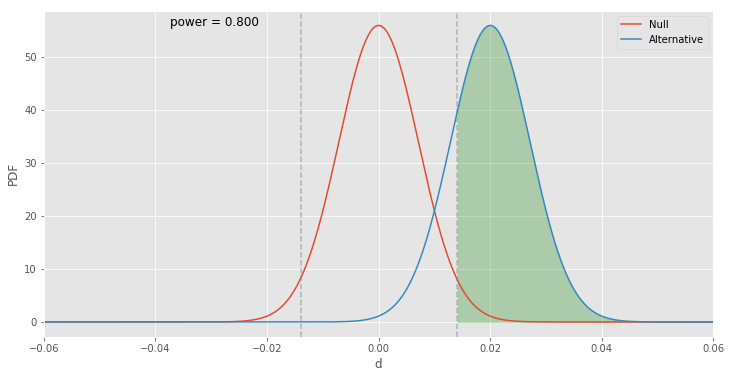

In [27]:
abplot(3842, 3842, 0.10, 0.02, show_power=True)